In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
from math import sin, cos
from scipy.integrate import odeint

In [3]:
# generate initial conditions
phi = np.random.random(500)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.4896500816672D+00   r2 =  0.2755979589439D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.4896500816672D+00   r2 =  0.2200041279791D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.4896500816672D+00   r2 =  0.1751234416041D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.4896500816672D+00   r2 =  0.1389891728930D-16
 lsoda--  warning..internal t (=r1) 

/Users/julianschmitt/opt/anaconda3/envs/AM205/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


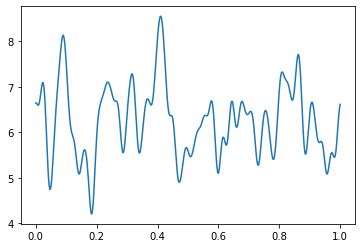

In [104]:
i = 10; L=5; B=1
phi[i-5:i+5]

def convolve1D(ar):
    convolved = np.zeros(len(ar))
    ar2 = np.concatenate([phi, phi]) # double array to prevent overflow indexing
    for i in range(len(ar)):
        convolved[i] = sum([np.exp(-(i-k)**2/(2*L**2))*ar2[k] for k in range(i-5*L, i+5*L)])
    return convolved
phi_conv = convolve1D(phi)

# define ramp-up function
def ramp(t):
    if t<5:
        return t*2
    else:
        return 10
rampv = np.vectorize(ramp)

def Kappa(p):
    return (1-p)**3/p**2
Kappav = np.vectorize(Kappa)

def grad_p(x, t,w=1):
    return -(1-x)*ramp(t)*w/Kappa(x)

def d_phi_dt(phi, t):
    deriv = np.zeros(len(phi))
    for i, x in enumerate(phi):
        p = grad_p(x, t)
        if p**2 < B**2/L**2:
            deriv[i] = 0
        else:
            deriv[i] = -np.abs(x*(p**2 -B**2/L**2))
    return deriv

from scipy.integrate import odeint

steps = odeint(d_phi_dt, phi_conv, np.linspace(0,6, 1000))
print(steps)

plt.plot(np.linspace(0, 1, len(phi)), convolve1D(phi))

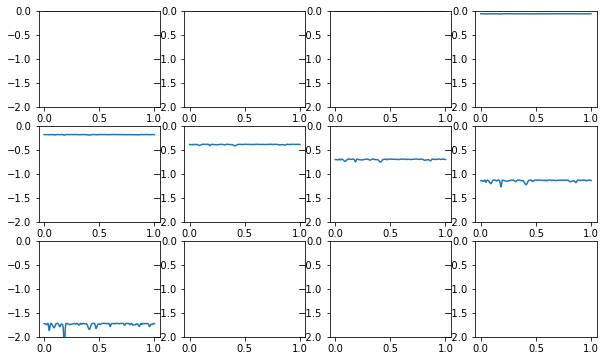

In [120]:
fig, ax = plt.subplots(3,4, figsize=(10,6))
axs = ax.ravel()
for i, ax in enumerate(axs):
    ax.plot(np.linspace(0,1,500), steps[i*10]-phi_conv)
    ax.set_ylim(-2,0)
#plt.plot(np.linspace(0, 1, 500), phi_conv)

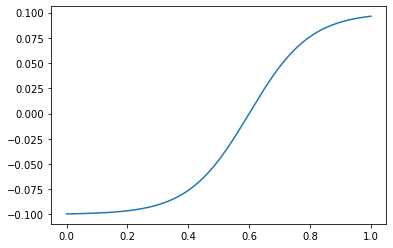

In [128]:
from math import tanh
xs = np.linspace(0, 1, 1000)
def psi(phi, c1 =0.1, w=5, phis=0.6, c2=1):
    return c1*tanh(w*(phi-phis))
psiv = np.vectorize(psi)
ys = psiv(xs)#[psi(x) for x in xs]

plt.plot(xs, ys)